# EDA - Exploratory Data Analysis
### Import Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train_data = pd.read_csv("./data/application_train.csv")
test_data = pd.read_csv("./data/application_test.csv")

### Univariate Analysis

In [3]:
print(train_data.shape)
train_data.head(10)

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Distinguish categorical features

In [4]:
categorical_features = {"NAME_CONTRACT_TYPE",
                        "CODE_GENDER",
                        "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
                        "NAME_TYPE_SUITE",
                        "NAME_INCOME_TYPE",
                        "NAME_EDUCATION_TYPE",
                        "NAME_FAMILY_STATUS",
                        "NAME_HOUSING_TYPE",
                        "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE",
                        "FLAG_EMAIL",
                        "OCCUPATION_TYPE",
                        "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
                        "WEEKDAY_APPR_PROCESS_START",
                        "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION",
                        "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY",
                        "ORGANIZATION_TYPE",
                        "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE",
                        "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6",
                        "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11",
                        "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16",
                        "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"}

In [5]:
for feature in categorical_features:
    train_data[feature] = train_data[feature].astype("category")
    test_data[feature] = test_data[feature].astype("category")
    
train_data["TARGET"] = train_data["TARGET"].astype("category")

### Drop unnecessary feature

In [6]:
if "SK_ID_CURR" in train_data.columns:
    train_data.drop(columns=["SK_ID_CURR"], inplace=True)

numerical_features = train_data.select_dtypes(include=["int64", "float64"]).columns
numerical_features

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_M

### Handle unstable data

In [7]:
train_data[train_data.duplicated()]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [8]:
null_data = train_data.isnull()
for col in null_data.columns:
    print("{} - {}".format(col, null_data[col].sum()))

TARGET - 0
NAME_CONTRACT_TYPE - 0
CODE_GENDER - 0
FLAG_OWN_CAR - 0
FLAG_OWN_REALTY - 0
CNT_CHILDREN - 0
AMT_INCOME_TOTAL - 0
AMT_CREDIT - 0
AMT_ANNUITY - 12
AMT_GOODS_PRICE - 278
NAME_TYPE_SUITE - 1292
NAME_INCOME_TYPE - 0
NAME_EDUCATION_TYPE - 0
NAME_FAMILY_STATUS - 0
NAME_HOUSING_TYPE - 0
REGION_POPULATION_RELATIVE - 0
DAYS_BIRTH - 0
DAYS_EMPLOYED - 0
DAYS_REGISTRATION - 0
DAYS_ID_PUBLISH - 0
OWN_CAR_AGE - 202929
FLAG_MOBIL - 0
FLAG_EMP_PHONE - 0
FLAG_WORK_PHONE - 0
FLAG_CONT_MOBILE - 0
FLAG_PHONE - 0
FLAG_EMAIL - 0
OCCUPATION_TYPE - 96391
CNT_FAM_MEMBERS - 2
REGION_RATING_CLIENT - 0
REGION_RATING_CLIENT_W_CITY - 0
WEEKDAY_APPR_PROCESS_START - 0
HOUR_APPR_PROCESS_START - 0
REG_REGION_NOT_LIVE_REGION - 0
REG_REGION_NOT_WORK_REGION - 0
LIVE_REGION_NOT_WORK_REGION - 0
REG_CITY_NOT_LIVE_CITY - 0
REG_CITY_NOT_WORK_CITY - 0
LIVE_CITY_NOT_WORK_CITY - 0
ORGANIZATION_TYPE - 0
EXT_SOURCE_1 - 173378
EXT_SOURCE_2 - 660
EXT_SOURCE_3 - 60965
APARTMENTS_AVG - 156061
BASEMENTAREA_AVG - 179943
YEARS_

### Describe the dataset

In [9]:
description = train_data.describe(include="all")
description

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,...,307511.0,307511.0,307511.0,307511.0,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,2.0,2,3,2,2,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
top,0.0,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,282686.0,278232,202448,202924,213312,NaN,NaN,NaN,NaN,NaN,...,305011.0,307328.0,307355.0,307408.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,...,NaN,NaN,NaN,NaN,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,NaN,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,...,NaN,NaN,NaN,NaN,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,NaN,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


Our dataset is not balanced, because _TARGET_ feature has a __freq__ a lot higher than half of its count.

Now identify and remove categorical features where __frequency__ of __top__ value is close to its __count__. That is the evidence of negligibility of the feature

In [10]:
for feat in description.columns:
    if description[feat]["freq"] / description[feat]["count"] > 0.99:
        if feat in categorical_features:
            categorical_features.remove(feat)
        if feat in train_data.columns:
            train_data.drop(columns=[feat], inplace=True)
        print("{} is useless".format(feat))

FLAG_MOBIL is useless
FLAG_CONT_MOBILE is useless
FLAG_DOCUMENT_2 is useless
FLAG_DOCUMENT_4 is useless
FLAG_DOCUMENT_7 is useless
FLAG_DOCUMENT_9 is useless
FLAG_DOCUMENT_10 is useless
FLAG_DOCUMENT_11 is useless
FLAG_DOCUMENT_12 is useless
FLAG_DOCUMENT_13 is useless
FLAG_DOCUMENT_14 is useless
FLAG_DOCUMENT_15 is useless
FLAG_DOCUMENT_16 is useless
FLAG_DOCUMENT_17 is useless
FLAG_DOCUMENT_18 is useless
FLAG_DOCUMENT_19 is useless
FLAG_DOCUMENT_20 is useless
FLAG_DOCUMENT_21 is useless


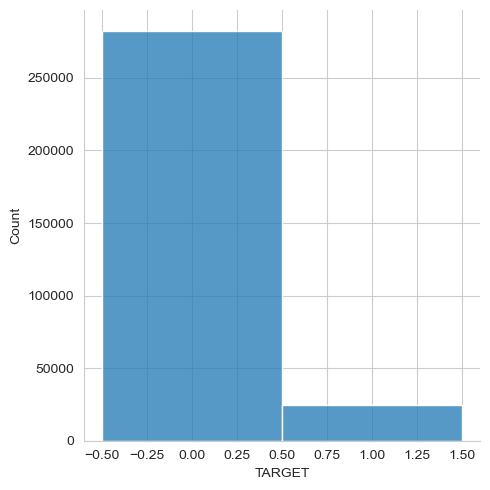

In [11]:
sns.displot(train_data["TARGET"])

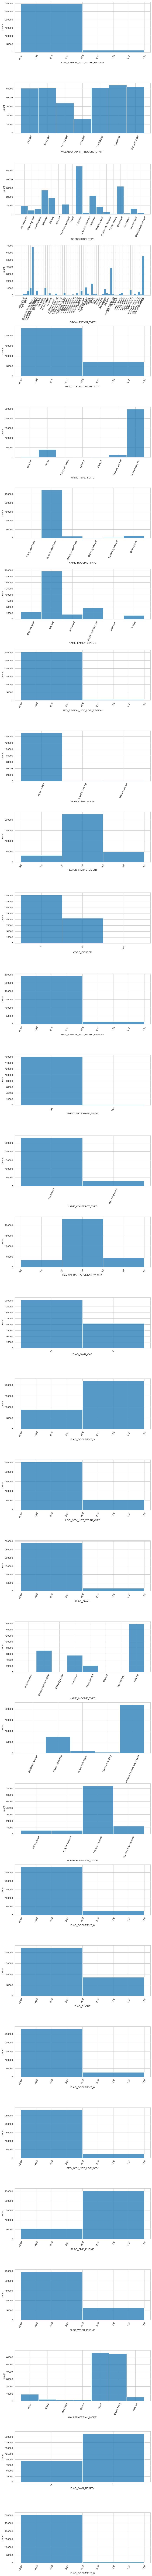

In [12]:
fig, axes = plt.subplots(len(categorical_features), ncols=1)
fig.set_size_inches(10, 190)

for i, col in enumerate(categorical_features):
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(65)
        
    sns.histplot(data=train_data, x=col, kde=False, ax=axes[i])

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

### Let's build distributions of each of our numerical features 

array([[<Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>],
       [<Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'HOUR_APPR_PROCESS_START'}>,
        <Axes: title={'center': 'EXT_SOURCE_1'}>,
        <Axes: title={'center': 'EXT_SOURCE_2'}>,
        <Axes: title={'center': 'EXT_SOURCE_3'}>],
       [<Axes: title={'center': 'APARTMENTS_AVG'}>,
        <Axes: title={'center': 'BASEMENTAREA_AVG'}>,
        <Axes: title={'center': 'YEARS_BEGINEXPLUATATI

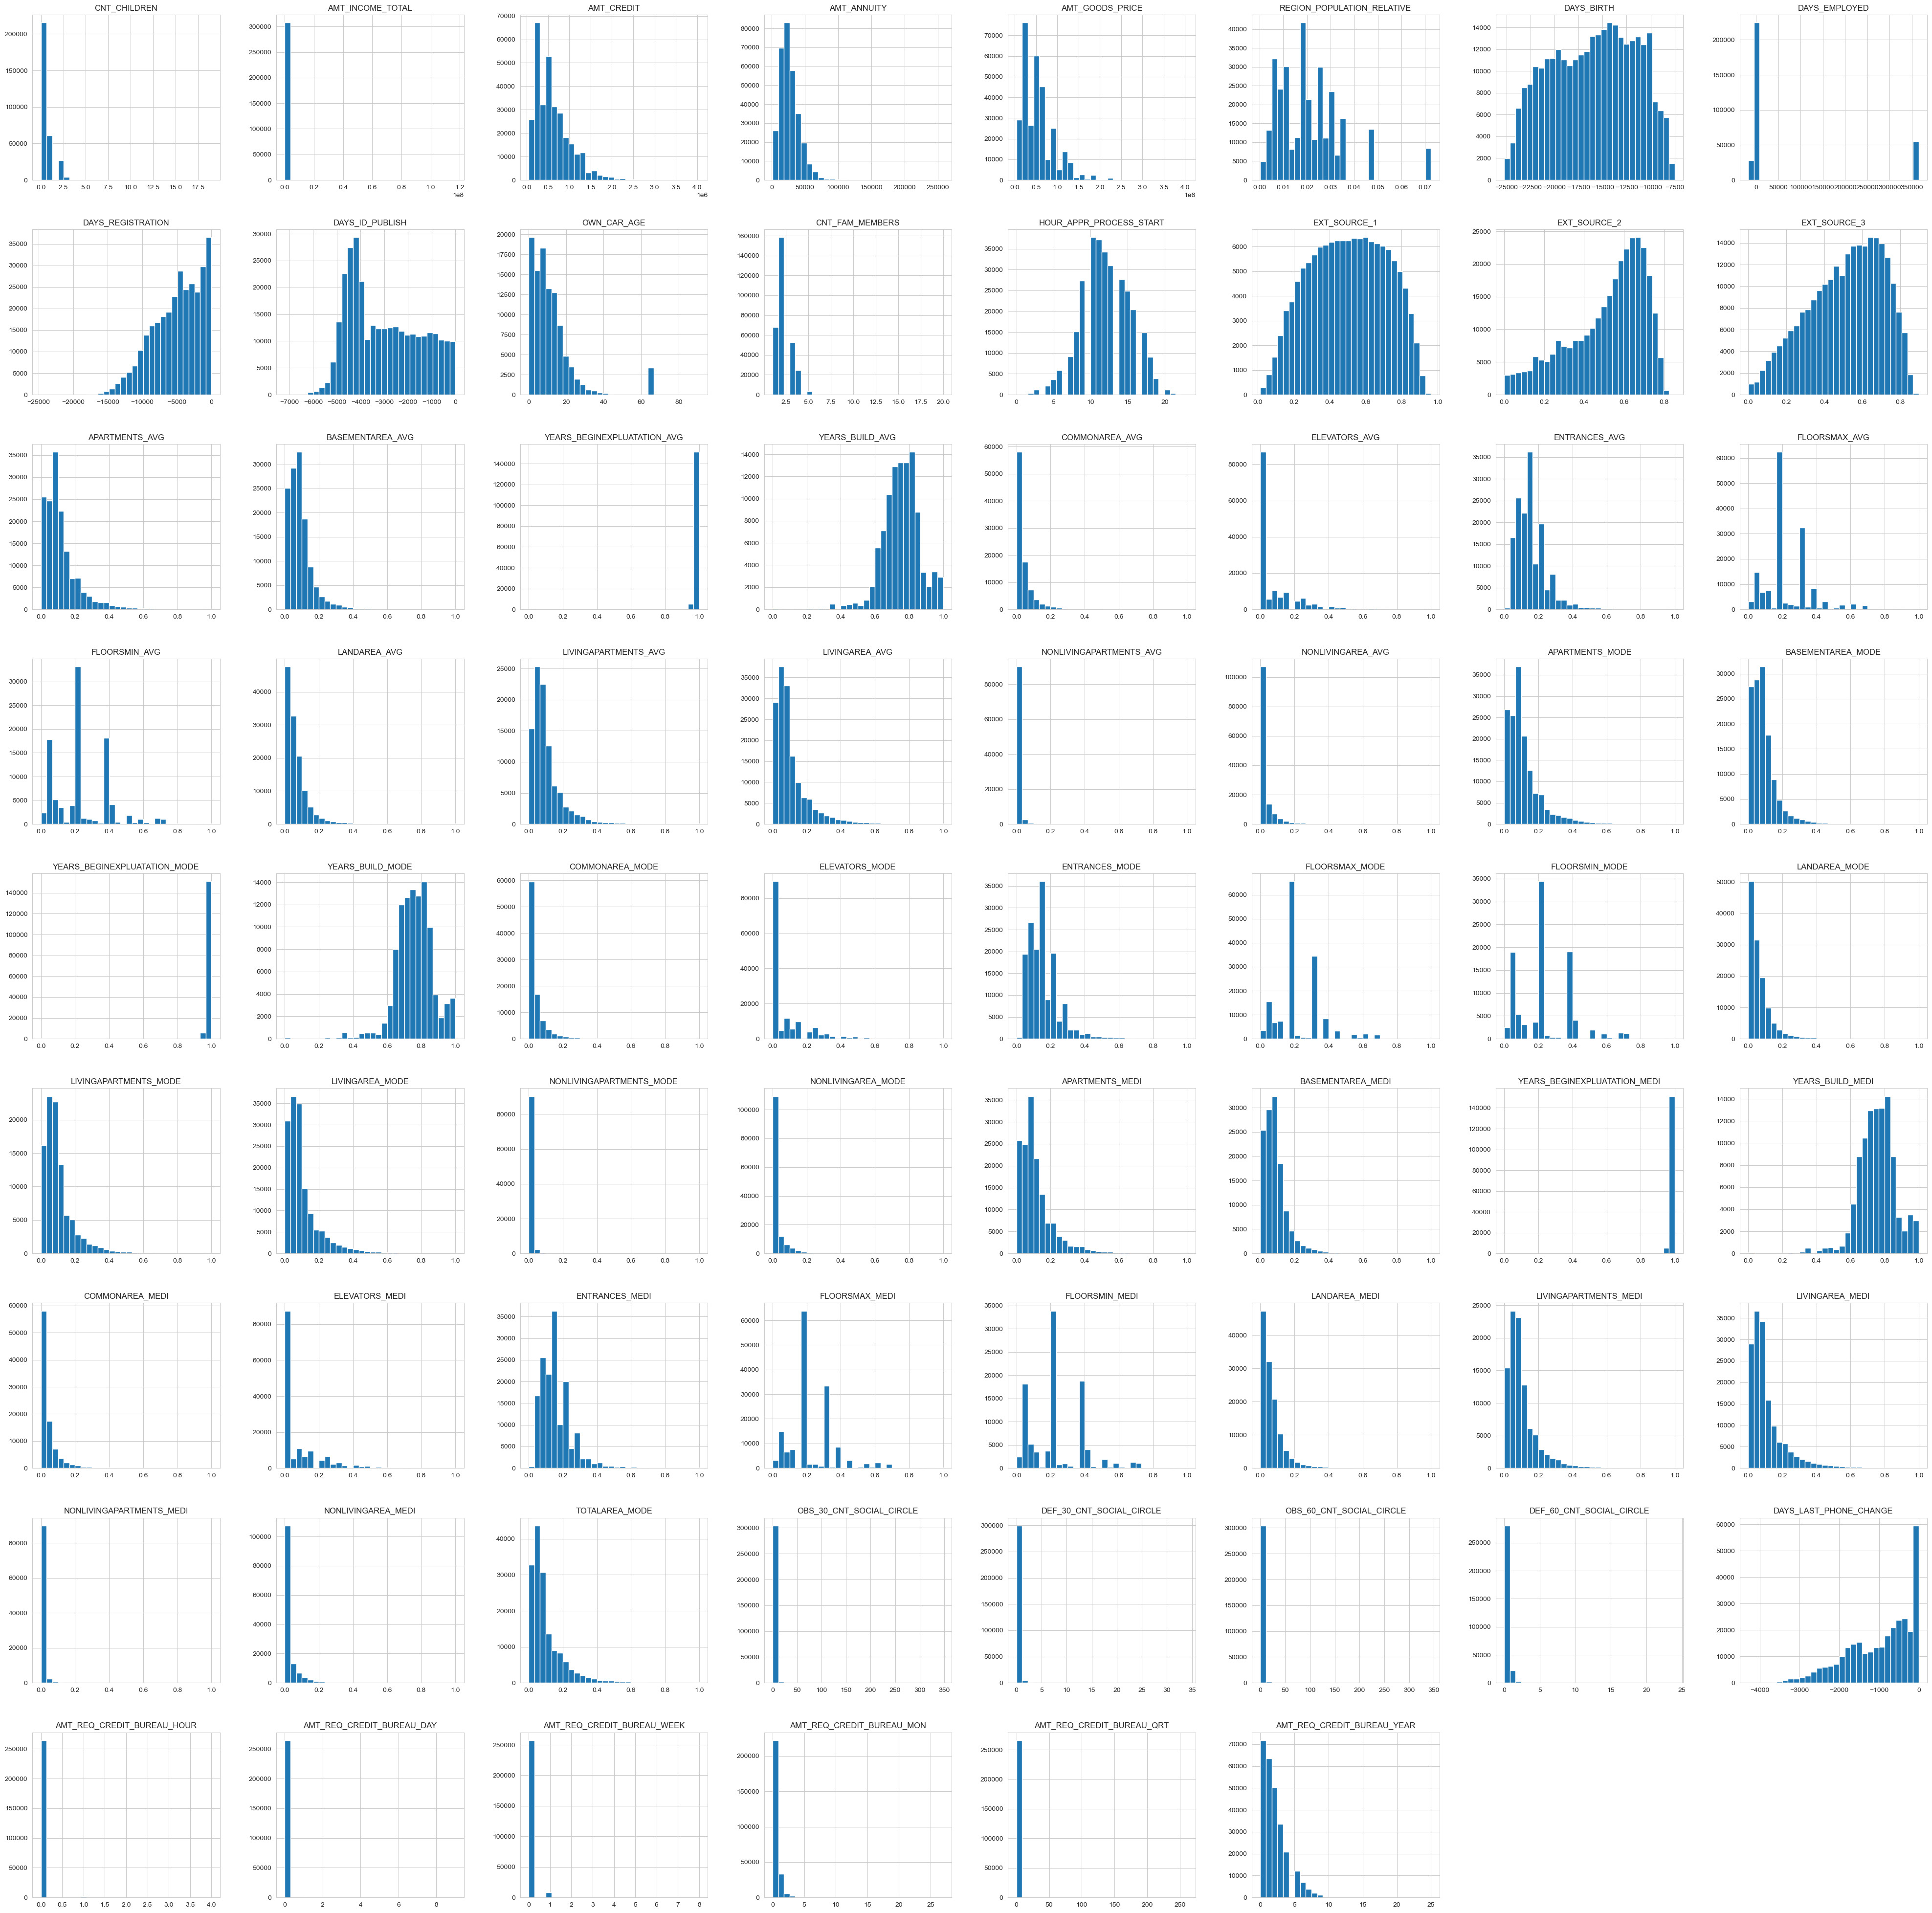

In [13]:
train_data[numerical_features].hist(figsize=(50, 50), bins=30, xlabelsize=10, ylabelsize=10)

### Let's identify Outliers

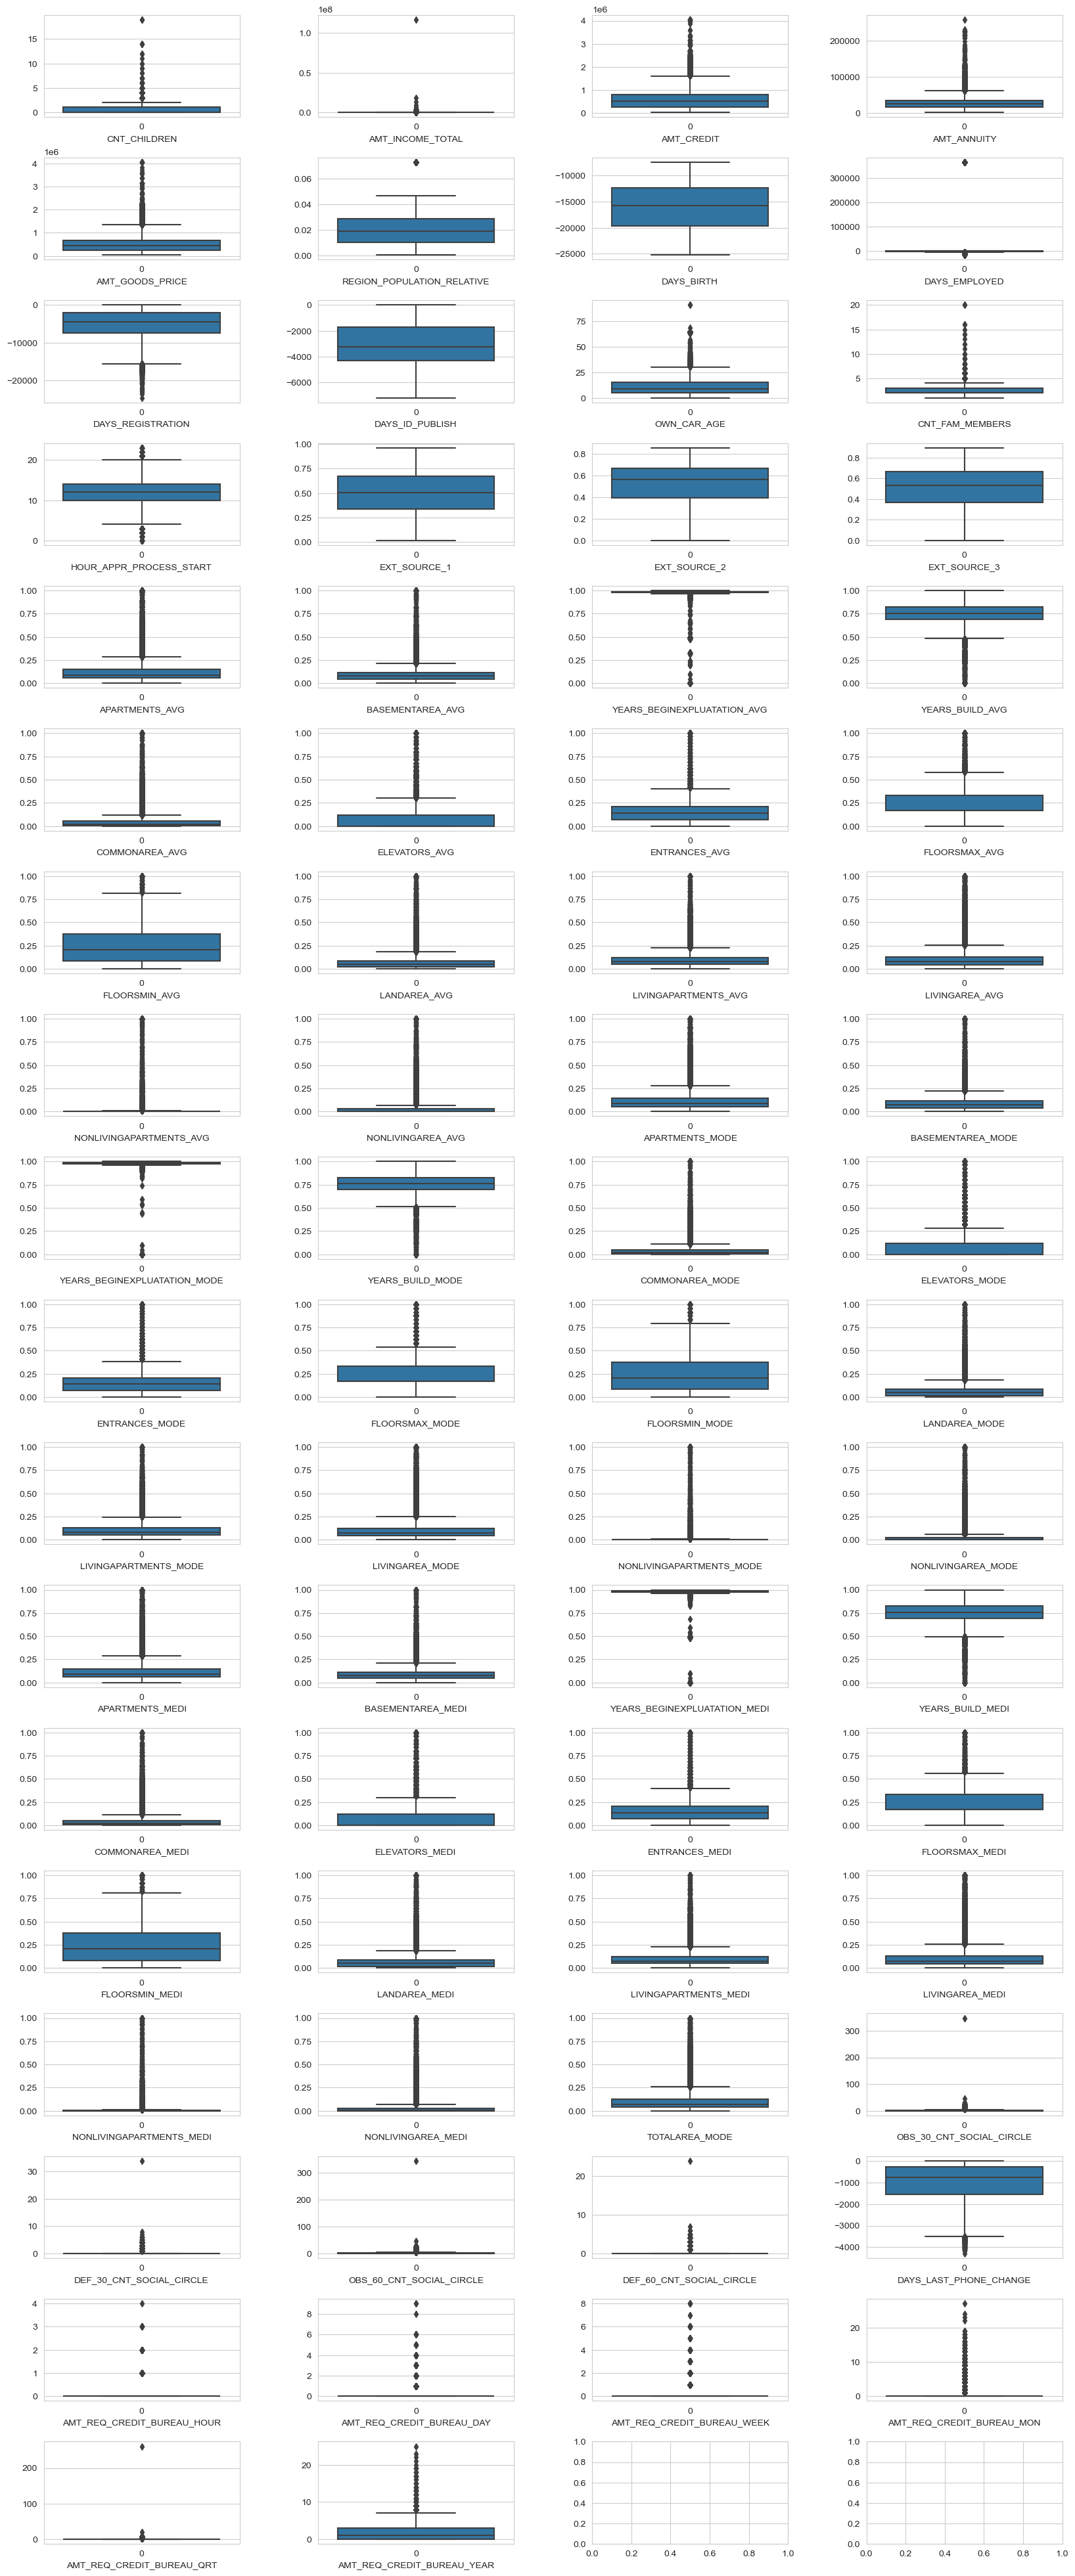

In [14]:
col_count = 4
fig, axes = plt.subplots(nrows=len(numerical_features) // col_count + 1, ncols=col_count)
fig.set_size_inches(20, 50)

for i, col in enumerate(numerical_features):
    sns.boxplot(train_data[col], ax=axes[i // col_count, i % col_count])
    axes[i // col_count, i % col_count].set_xlabel(col)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

### Correlation Matrix (numerical features)

<Axes: >

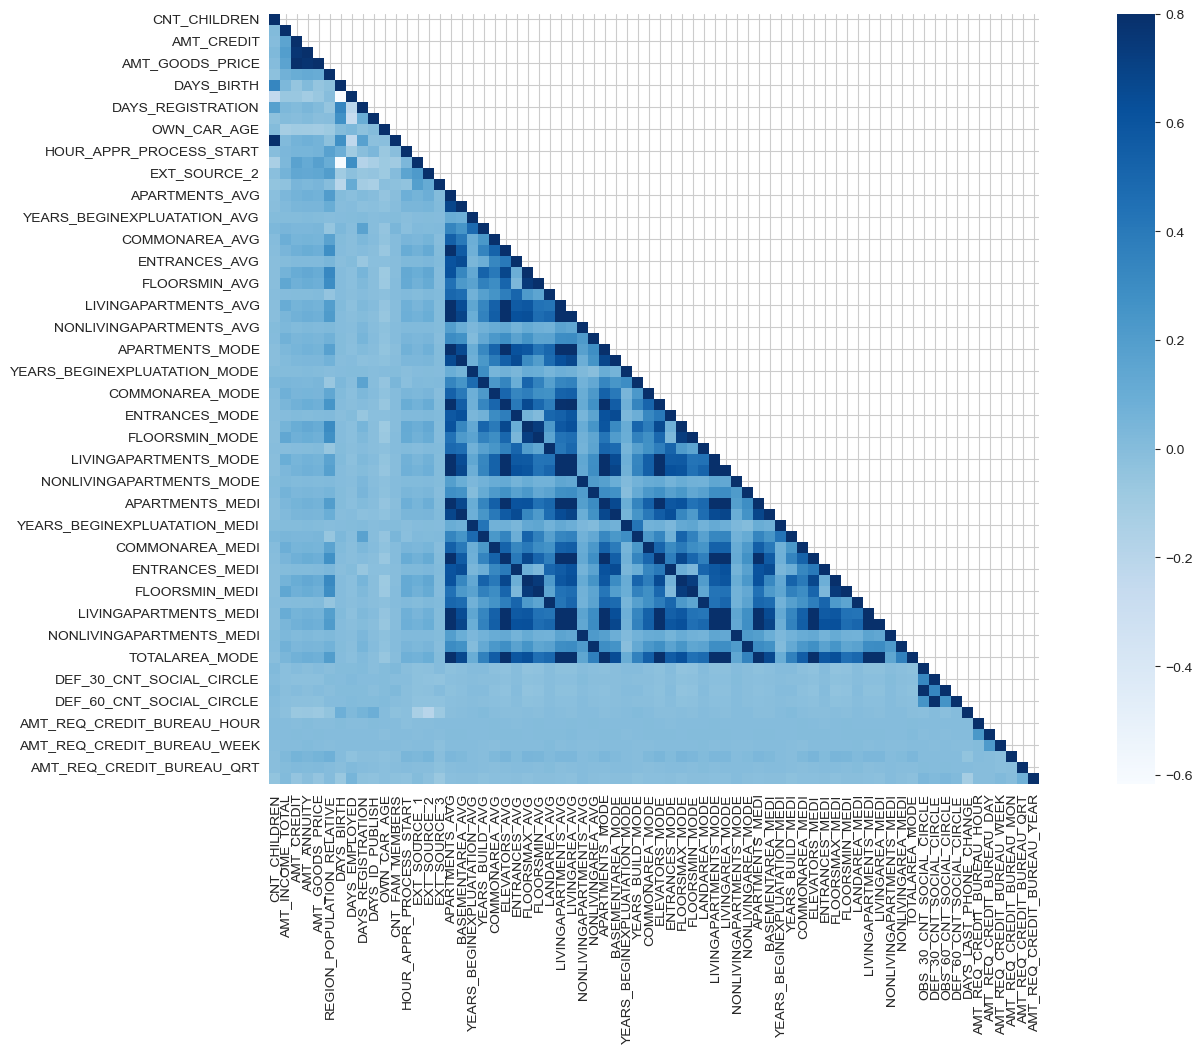

In [15]:
corrMatt = train_data[numerical_features].corr()

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

fig, axes = plt.subplots()
fig.set_size_inches(20,10)

sns.heatmap(corrMatt, cmap="Blues", mask=mask, vmax=.8, square=True, annot=False)

We can see correlation of features related to apartments' parameters. That is expected because architects tend to use tested placing of rooms. 

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [17]:
train_data[numerical_features] = train_data[numerical_features].fillna(0)
test_data[numerical_features] = test_data[numerical_features].fillna(0)

train_x, val_x, train_y, val_y = train_test_split(train_data[numerical_features], train_data["TARGET"], test_size=0.2)

print(f"Train: {train_x.shape}, {train_y.shape}")
print(f"Validation: {val_x.shape}, {val_y.shape}")

Train: (246008, 70), (246008,)
Validation: (61503, 70), (61503,)


In [18]:
sc = StandardScaler()
scaled_train_x = sc.fit_transform(train_x)

scaled_val_x = sc.transform(val_x)
scaled_test_x = sc.transform(test_data[numerical_features])

In [19]:
lr = LogisticRegression(class_weight="balanced", max_iter=1000)
lr.fit(scaled_train_x, train_y)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [20]:
train_pred = lr.predict(scaled_train_x)
print(f"Train ROC_AUC: {roc_auc_score(train_y, train_pred)}")

Train ROC_AUC: 0.6573784852555324


In [21]:
test_pred = lr.predict(scaled_val_x)
print(f"Test ROC_AUC: {roc_auc_score(val_y, test_pred)}")

Test ROC_AUC: 0.6615779084141505


In [22]:
test_pred = lr.predict_proba(scaled_test_x)[:, 1]
test_output = pd.DataFrame(test_data["SK_ID_CURR"])
test_output["TARGET"] = test_pred
test_output.head(10)

,SK_ID_CURR,TARGET
0,100001,0.279731
1,100005,0.519525
2,100013,0.395591
3,100028,0.192165
4,100038,0.606371
5,100042,0.406808
6,100057,0.278200
7,100065,0.428622
8,100066,0.238789
9,100067,0.569288


In [23]:
test_output.to_csv('./data/submission_output.csv', index=False)